In [1]:
from scipy.integrate import odeint
import numpy

# Define constants 

g = 9.81
c = 3e8
YEAR_S = 3.154e7
AU = 1.496e11

def EoM(U, t, T2W, v_e, m_0, P_0):  # EoM of the catcher
    x, dx_dt = U 
    
    # Find parameters of system from inputs
    F_L = 2 * P_0 / c
    tau = T2W * g
    
    # return [dx_dt, d2x_dt2]
    return[dx_dt, tau * (1 - m_0 * dx_dt**3 / ( v_e * F_L * x))]

In [2]:
# t values over which differential equation is solved

ts = numpy.linspace(0, 4 * YEAR_S, 3e6)

C:\Users\user\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


# Varying Thrust to Weight 

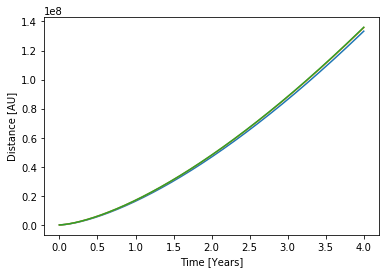

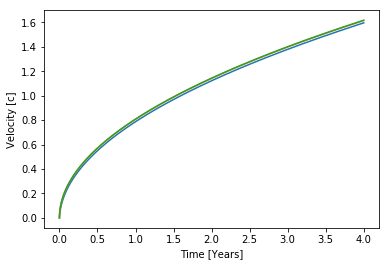

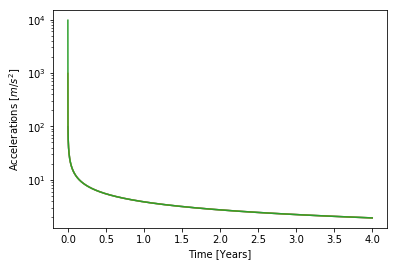

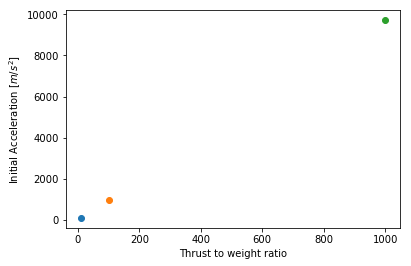

In [5]:
import matplotlib.pyplot as pyplot

# Thrust to weight array for trajectories to be plotted
T2Ws = numpy.logspace(1, 3, 3)

for i in range(len(T2Ws)):
    # choose param values 
    v_e, m_0, P_0 = 6e3, 0.001, 70e9
    
    # Calc thrust to mass ratio
    tau = T2Ws[i] * g 
    
    # define inital conditions such that the inital acceleration of the spacecraft is equivalent to the acceleration in
    # the case where the launcher is right next to the spacecraft (i.e. no time mapping).
    # Can imagine we have to send the sapcecraft carrying some reaction mass which it uses to begin accelerating - important 
    # to remember model is only valid when spacecraft is accelerating. 
    # Will arbitrarily take v_0 to be constant and vary x_0 to satisfy the above condition 
    
    v_0 = 2.9e3
    a_0 = 1 / ( 1 / tau + m_0 * v_0 / (v_e * 2 * P_0 / c) )
    x_0 = (tau * m_0 * v_0**3) / ( (tau - a_0) * v_e * 2 * P_0 / c ) 
    U0 = [x_0, v_0]
    
    Us = odeint(EoM, U0, ts, args=( T2Ws[i], v_e, m_0, P_0))
    xs = Us[:,0]
    vs = Us[:,1]
    
    pyplot.figure(1)
    pyplot.plot(ts / YEAR_S, xs / c)
    pyplot.xlabel('Time [Years]')
    pyplot.ylabel('Distance [AU]')
    
    pyplot.figure(2)
    pyplot.plot(ts / YEAR_S, vs / c )
    pyplot.xlabel('Time [Years]')
    pyplot.ylabel('Velocity [c]')
    
    pyplot.figure(3)
    accels = T2Ws[i] * g * (1 - m_0 * c * vs**3 / ( v_e * 2 * P_0 * xs) )
    pyplot.xlabel('Time [Years]')
    pyplot.ylabel('Accelerations [$m/s^2$]')
    
    pyplot.semilogy(ts / YEAR_S, accels)
    
    pyplot.figure(4)
    pyplot.plot(T2Ws[i], a_0, marker = 'o')
    pyplot.xlabel('Thrust to weight ratio')
    pyplot.ylabel('Initial Acceleration [$m/s^2$]')
    
pyplot.show()

# Varying Exhaust Velocty

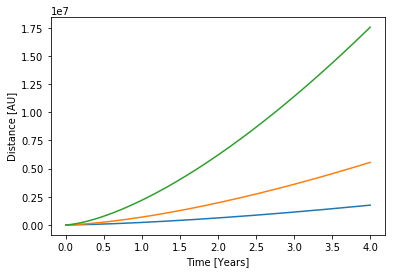

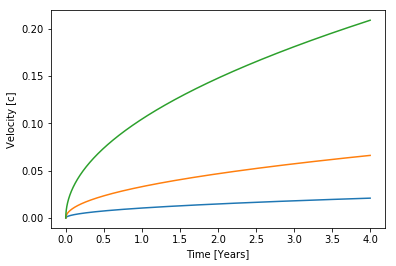

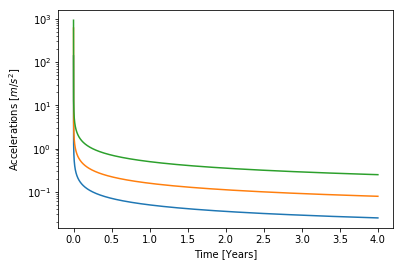

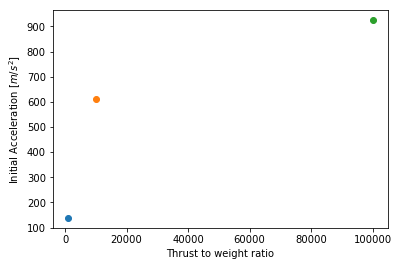

In [4]:
import matplotlib.pyplot as pyplot

V_es = numpy.logspace(3, 5, 3)

for i in range(len(V_es)):
    T2W, m_0, P_0 = 1e2, 1, 70e9
    
    tau = T2W * g 
    
    # define inital conditions such that the inital acceleration of the spacecraft is equivalent to the acceleration in
    # the case where the launcher is right next to the spacecraft (i.e. no time mapping).
    # Can imagine we have to send the sapcecraft carrying some reaction mass which it uses to begin accelerating - important 
    # to remember model is only valid when spacecraft is accelerating. 
    # Will arbitrarily take v_0 to be constant and vary x_0 to satisfy the above condition 
    
    v_0 = 2.9e3
    a_0 = 1 / ( 1 / tau + m_0 * v_0 / (V_es[i] * 2 * P_0 / c) )
    x_0 = (tau * m_0 * v_0**3) / ( (tau - a_0) * V_es[i] * 2 * P_0 / c ) 
    U0 = [x_0, v_0]
    
    Us = odeint(EoM, U0, ts, args=(T2W, V_es[i], m_0, P_0) )
    xs = Us[:,0]
    vs = Us[:,1]
    
    pyplot.figure(1)
    pyplot.plot(ts / YEAR_S, xs / c)
    pyplot.xlabel('Time [Years]')
    pyplot.ylabel('Distance [AU]')
    
    pyplot.figure(2)
    pyplot.plot(ts / YEAR_S, vs / c )
    pyplot.xlabel('Time [Years]')
    pyplot.ylabel('Velocity [c]')
    
    pyplot.figure(3)
    accels = T2W * g * (1 - m_0 * c * vs**3 / ( V_es[i] * 2 * P_0 * xs) )
    pyplot.xlabel('Time [Years]')
    pyplot.ylabel('Accelerations [$m/s^2$]')
    
    pyplot.semilogy(ts / YEAR_S, accels)
    
    pyplot.figure(4)
    pyplot.plot(V_es[i], a_0, marker = 'o')
    pyplot.xlabel('Thrust to weight ratio')
    pyplot.ylabel('Initial Acceleration [$m/s^2$]')
    
pyplot.show()